In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import rasterio as rst
from rasterio.mask import mask
import geopandas as gpd

from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

import warnings
warnings.filterwarnings("ignore")

In [20]:
vh_f = pd.read_csv('D:/thesis_data/SAR/stats/florestal_VH_reindex.csv')
vh_s = pd.read_csv('D:/thesis_data/SAR/stats/savanica_VH_reindex.csv')
vh_c = pd.read_csv('D:/thesis_data/SAR/stats/campestre_VH_reindex.csv')

vv_f = pd.read_csv('D:/thesis_data/SAR/stats/florestal_VV_reindex.csv')
vv_s = pd.read_csv('D:/thesis_data/SAR/stats/savanica_VV_reindex.csv')
vv_c = pd.read_csv('D:/thesis_data/SAR/stats/campestre_VV_reindex.csv')

In [21]:
def month_season_detector(df):

    df['data'] = pd.to_datetime(df['date'], format='%Y/%m/%d')

    df['month'] = df['data'].dt.month

    df.loc[df['month']==1,'mes'] = 'Jan'
    df.loc[df['month']==2,'mes'] = 'Feb'
    df.loc[df['month']==3,'mes'] = 'Mar'
    df.loc[df['month']==4,'mes'] = 'Apr'
    df.loc[df['month']==5,'mes'] = 'May'
    df.loc[df['month']==6,'mes'] = 'Jun'
    df.loc[df['month']==7,'mes'] = 'Jul'
    df.loc[df['month']==8,'mes'] = 'Aug'
    df.loc[df['month']==9,'mes'] = 'Sep'
    df.loc[df['month']==10,'mes'] = 'Oct'
    df.loc[df['month']==11,'mes'] = 'Nov'
    df.loc[df['month']==12,'mes'] = 'Dec'

    df.loc[df['month']==1,'season'] = 'wet'
    df.loc[df['month']==2,'season'] = 'wet'
    df.loc[df['month']==3,'season'] = 'wet'
    df.loc[df['month']==4,'season'] = 'wet'
    df.loc[df['month']==5,'season'] = 'dry'
    df.loc[df['month']==6,'season'] = 'dry'
    df.loc[df['month']==7,'season'] = 'dry'
    df.loc[df['month']==8,'season'] = 'dry'
    df.loc[df['month']==9,'season'] = 'dry'
    df.loc[df['month']==10,'season'] = 'wet'
    df.loc[df['month']==11,'season'] = 'wet'
    df.loc[df['month']==12,'season'] = 'wet'

In [22]:
month_season_detector(vh_f)
month_season_detector(vh_s)
month_season_detector(vh_c)

month_season_detector(vv_f)
month_season_detector(vv_s)
month_season_detector(vv_c)

In [23]:
rain = pd.read_csv('D:/thesis_data/pluviometric_data/pluviometric_data_PNB_paper_01.csv', sep=',')

month_season_detector(rain)

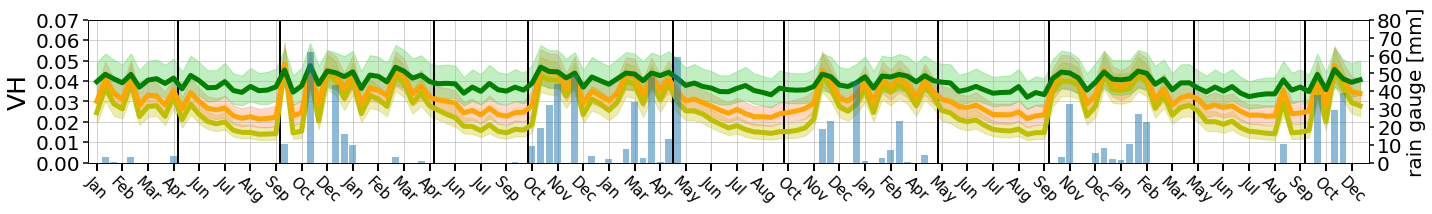

In [41]:
label_size = 20

x = vh_f.index

fig, ax = plt.subplots(figsize=(20,3))

ax.vlines(x[9] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[21] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[39] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[50] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[67] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[80] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[98] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[111] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[128] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[141] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)

ax.plot(x, vh_c['median'], 'y', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Grassland')
ax.fill_between(x, vh_c['percentile_25'], vh_c['percentile_75'], alpha=0.3, color='y')

ax.plot(x, vh_s['median'], 'orange', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Savanna')
ax.fill_between(x, vh_s['percentile_25'], vh_s['percentile_75'], alpha=0.3, color='coral')

ax.plot(x, vh_f['median'], 'green', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Forest')
ax.fill_between(x, vh_f['percentile_25'], vh_f['percentile_75'], alpha=0.3, color='limegreen')

ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, length=8, width=2)
ax.set_xticks(ticks=x)
ax.set_xticklabels(labels=vh_f['mes'], fontdict={'fontsize': 15, 'rotation': -45})
ax.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
ax.set_ylim([0, 0.07])
ax.set_xlim([-1, 149])
ax.set_ylabel('VH', fontsize=25)
ax.locator_params(axis='x', nbins=60)
ax.locator_params(axis='y', nbins=8)
ax.grid(True, alpha=0.7)

sec_0 = ax.twinx()
sec_0.bar(rain['date'], rain['gauge_mm'], alpha=0.5)
sec_0.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
sec_0.locator_params(axis='y', nbins=12)
sec_0.set_ylim([0, 80])
sec_0.set_ylabel('rain gauge [mm]', fontsize=20)

#sec_0.set_yticks(np.linspace(sec_0.get_yticks()[0], sec_0.get_yticks()[-1], len(ax.get_yticks())))

plt.tight_layout()

plt.savefig('C:/Users/jales/Desktop/VH_profiles.svg', dpi=None, facecolor='w', edgecolor='w',
    orientation='landscape', format='svg', transparent=False)

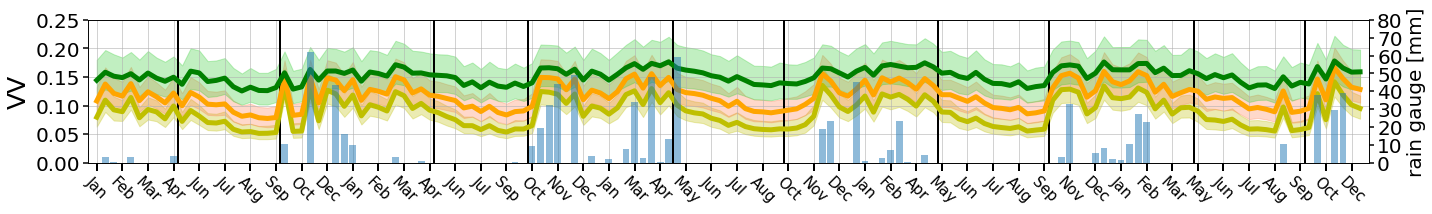

In [40]:
label_size = 20

x = vh_f.index

fig, ax = plt.subplots(figsize=(20,3))

ax.vlines(x[9] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[21] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[39] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[50] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[67] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[80] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[98] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[111] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[128] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[141] + 0.5, ymin=0, ymax=1.5, colors='k', linewidth=2)

ax.plot(x, vv_c['median'], 'y', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Grassland')
ax.fill_between(x, vv_c['percentile_25'], vv_c['percentile_75'], alpha=0.3, color='y')

ax.plot(x, vv_s['median'], 'orange', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Savanna')
ax.fill_between(x, vv_s['percentile_25'], vv_s['percentile_75'], alpha=0.3, color='coral')

ax.plot(x, vv_f['median'], 'green', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Forest')
ax.fill_between(x, vv_f['percentile_25'], vv_f['percentile_75'], alpha=0.3, color='limegreen')

ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, length=8, width=2)
ax.set_xticks(ticks=x)
ax.set_xticklabels(labels=vh_f['mes'], fontdict={'fontsize': 15, 'rotation': -45})
ax.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
ax.set_ylim([0, 0.25])
ax.set_xlim([-1, 149])
ax.set_ylabel('VV', fontsize=25)
ax.locator_params(axis='x', nbins=60)
ax.locator_params(axis='y', nbins=8)
ax.grid(True, alpha=0.7)

sec_0 = ax.twinx()
sec_0.bar(rain['date'], rain['gauge_mm'], alpha=0.5)
sec_0.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
sec_0.locator_params(axis='y', nbins=12)
sec_0.set_ylim([0, 80])
sec_0.set_ylabel('rain gauge [mm]', fontsize=20)

#sec_0.set_yticks(np.linspace(sec_0.get_yticks()[0], sec_0.get_yticks()[-1], len(ax.get_yticks())))

plt.tight_layout()

plt.savefig('C:/Users/jales/Desktop/VV_profiles.svg', dpi=None, facecolor='w', edgecolor='w',
    orientation='landscape', format='svg', transparent=False)